In [44]:
# each attributes short descrition

# 1. ID=Customer's unique identifier
# 2. Year_Birth=Customer's birth year
# 3. Education=Customer's education level
# 4. Marital_Status=Customer's marital status
# 5. Income=Customer's yearly household income
# 6. Kidhome=Number of children in customer's household
# 7. Teenhome=Number of teenagers in customer's household
# 8. Dt_Customer=Date of customer's enrollment with the company
# 9. Recency=Number of days since customer's last purchase
# 10. MntWines=Amount spent on wine in the last 2 years
# 11. MntFruits=Amount spent on fruits in the last 2 years
# 12. MntMeatProducts=Amount spent on meat in the last 2 years
# 13. MntFishProducts=Amount spent on fish in the last 2 years
# 14. MntSweetProducts=Amount spent on sweets in the last 2 years
# 15. MntGoldProds=Amount spent on gold in the last 2 years
# 16. NumDealsPurchases=Number of purchases made with a discount
# 17. NumWebPurchases=Number of purchases made through the company's web site
# 18. NumCatalogPurchases=Number of purchases made using a catalogue
# 19. NumStorePurchases=Number of purchases made directly in stores
# 20. NumWebVisitsMonth=Number of visits to company's web site in the last month
# 21. AcceptedCmp3=1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# 22. AcceptedCmp4=1 if customer accepted the offer in the 4th campaign, 0 otherwise
# 23. AcceptedCmp5=1 if customer accepted the offer in the 5th campaign, 0 otherwise
# 24. AcceptedCmp1=1 if customer accepted the offer in the 1st campaign, 0 otherwise
# 25. AcceptedCmp2=1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# 26. Response=1 if customer accepted the offer in the last campaign, 0 otherwise
# 27. Complain=1 if customer complained in the last 2 years, 0 otherwise
# 28. Country=Customer's location


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_data.csv')
df.head()#get a general look at the dataframe before working it

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [45]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [46]:
len(df)

2240

In [7]:
pd.options.display.max_columns = None#set jupyter notebook to display all the columns of the dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [2]:
# rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
df[df[' Income '].isnull()].index.tolist()#the tolist() method returns a list of relevent values in this instance it is returning a list of indces that have a null value in the income 

[134,
 262,
 394,
 449,
 525,
 590,
 899,
 997,
 1096,
 1185,
 1213,
 1312,
 1515,
 1558,
 1693,
 1804,
 1858,
 1863,
 1880,
 1967,
 1983,
 2139,
 2165,
 2170]

In [16]:
df.shape# checking the shape of the dataframe

(2240, 28)

In [17]:
df.columns# check column names for abnormalities

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [3]:
df.rename(mapper = str.strip, axis = 'columns',inplace = True)# Strip all columns of white spaces
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
df.info()#check each columns data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 n

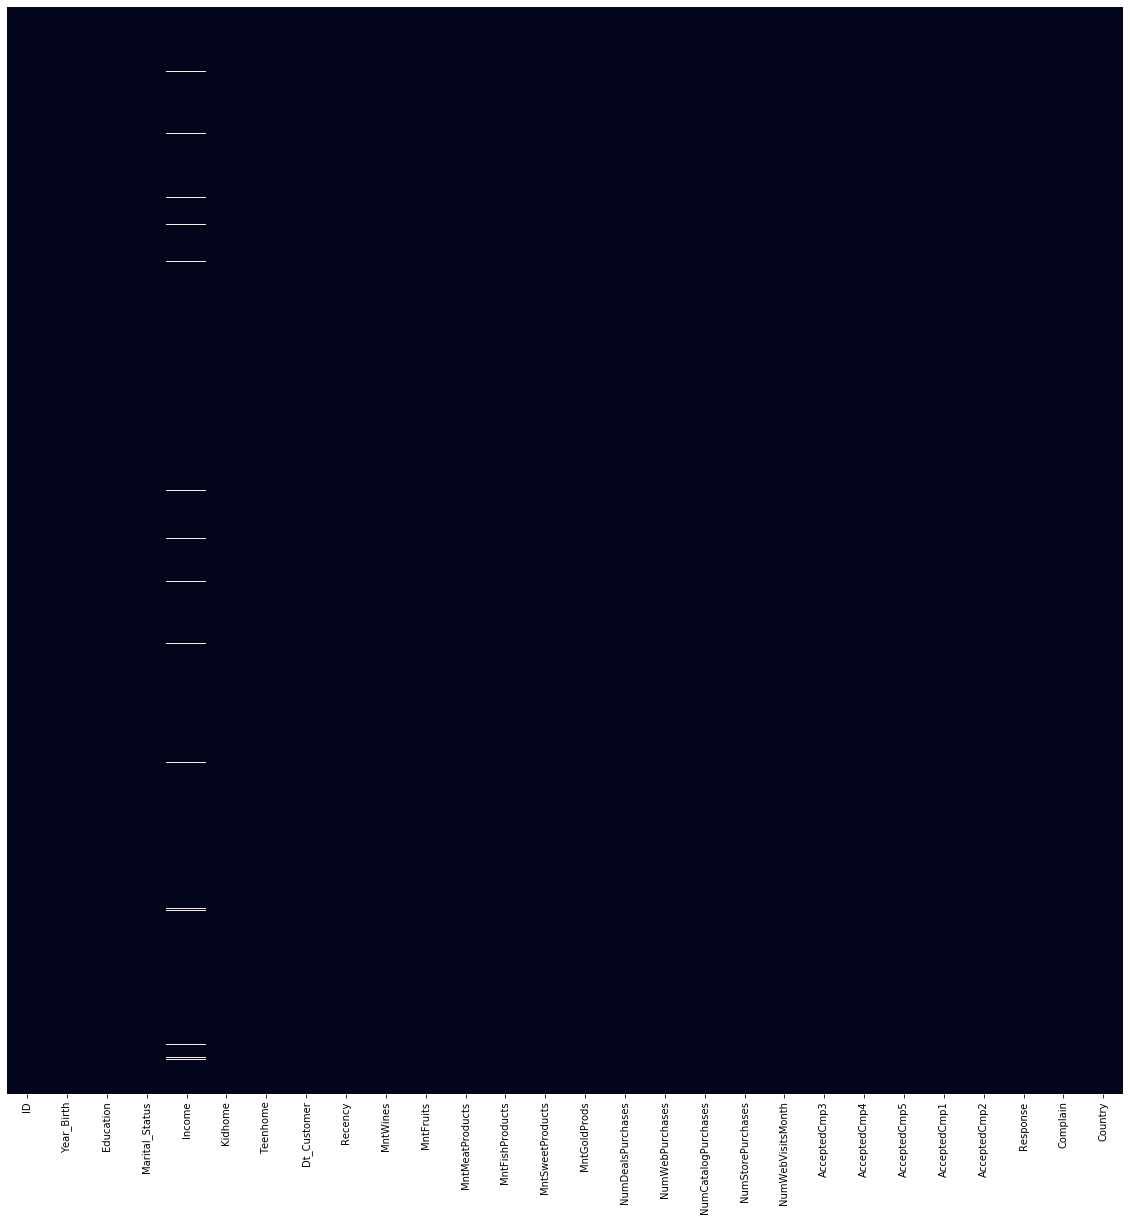

In [7]:
#visually check for missing values in the Dataframe
plt.subplots(figsize = (20,20))

sns.heatmap(df.isnull(),yticklabels = False,cbar=False)

plt.show()

In [8]:
def clean_money(x):
    
    a = int(x.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
    return a
    
df.rename(mapper = str.strip, axis = 'columns',inplace = True)

df['Income'] = df['Income'].dropna().apply(clean_money)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [10]:
#create new column with the ages of customers
def calculate_age(x):
    age = 2022 - x
    return age

df['Age'] = df['Year_Birth'].apply(calculate_age)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,52
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,61
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,64
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,55
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,33


In [41]:
Worling_dataset = df.assign(agegroup=pd.cut(df['Age'], bins=[0,18,26,36, 46,61,100], right=False, 
                                 labels=['Below 18 years', 'Between 18 and 25','Between 26 and 35' ,
                                         'Between 36 and 45','Between 46 and 60','Above 60']))

In [42]:
dx = len (Worling_dataset[Worling_dataset['Response'] == 1])
dx

334

In [43]:
dv = len (Worling_dataset[Worling_dataset['Response'] != 1])
dv

1906

In [19]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_data.csv')

list_medium_income=[]
list0=[]

a=pd.DataFrame(df[' Income '].isna().values,columns=['Incomenan'])#create a dataframe with a single column filled with boolean expressins of weather a person has an income or not

for i in df[' Income '].copy().dropna():#edit income column to convert the observations from string objects to int
    foo=int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))#split() works on a string not an a list 
    list_medium_income.append(foo)
    
df[' Income ']=df[' Income '].fillna(int(np.mean(list_medium_income)))#fill all missing values on the income column with the the mean of the valuesof the columns

for i in df[' Income ']:#i dont understand why this column is multiplied by a 1000
    if i ==int(np.mean(list_medium_income)):
        list0.append(i*1000)
        pass
    else:
        foo=int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
        list0.append(foo*1000)
        
df_1=pd.concat([df.drop(columns=[' Income ','ID']),pd.DataFrame(list0,columns=['Income']),a],axis=1)#concantinate the edited income column, the boolnean column which indicates wether a person has an income or not

df_1.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Incomenan
0,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,379,...,0,0,0,0,0,1,0,SP,84835000,False
1,1961,Graduation,Single,0,0,6/15/14,0,464,5,64,...,0,0,0,0,1,1,0,CA,57091000,False
2,1958,Graduation,Married,0,1,5/13/14,0,134,11,59,...,0,0,0,0,0,0,0,US,67267000,False
3,1967,Graduation,Together,1,1,5/11/14,0,10,0,1,...,0,0,0,0,0,0,0,AUS,32474000,False
4,1989,Graduation,Single,1,0,4/8/14,0,6,16,24,...,1,0,0,0,0,1,0,SP,21474000,False


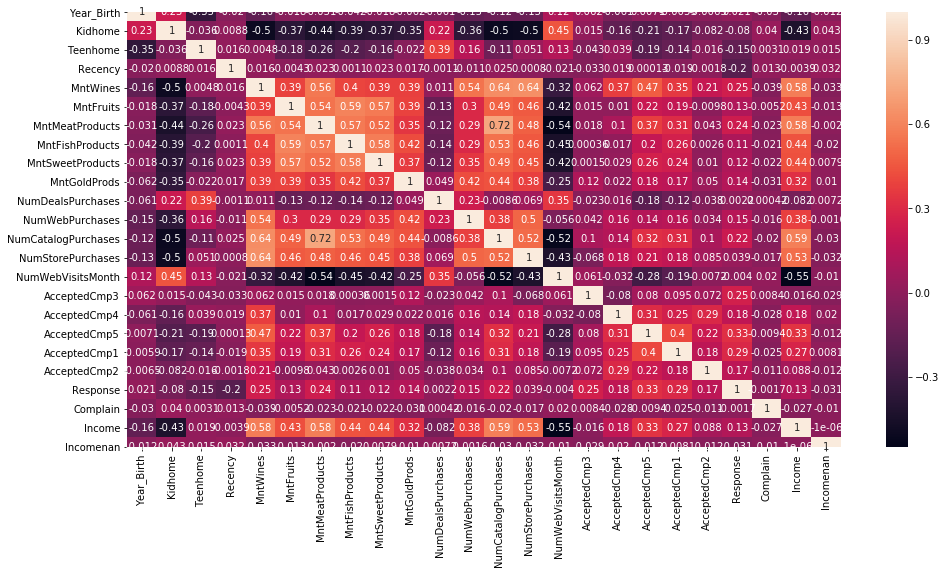

In [8]:
plt.figure(figsize = (16,8))
sns.heatmap(df_1.corr(),annot = True)

plt.show()

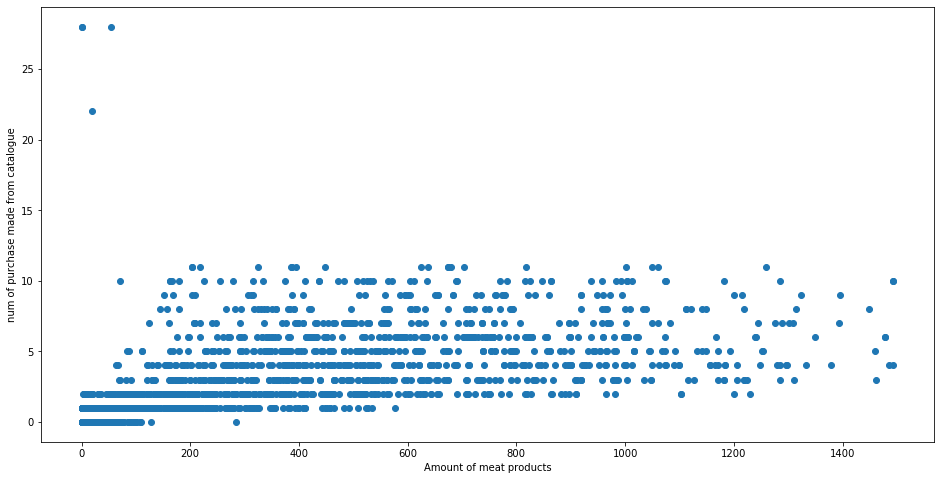

In [14]:
plt.figure(figsize = (16,8))
plt.scatter(df_1['MntWines'],df_1['NumCatalogPurchases'])

plt.xlabel('Amount of meat products')
plt.ylabel('num of purchase made from catalogue')
plt.show()

In [9]:
df_1.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Income', 'Incomenan'],
      dtype='object')

In [17]:
for i in df_1.columns:
    print(F'{i}:',len(df_1[i].unique()))

Year_Birth: 59
Education: 5
Marital_Status: 8
Kidhome: 3
Teenhome: 3
Dt_Customer: 663
Recency: 100
MntWines: 776
MntFruits: 158
MntMeatProducts: 558
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Response: 2
Complain: 2
Country: 8
Income: 1975
Incomenan: 2


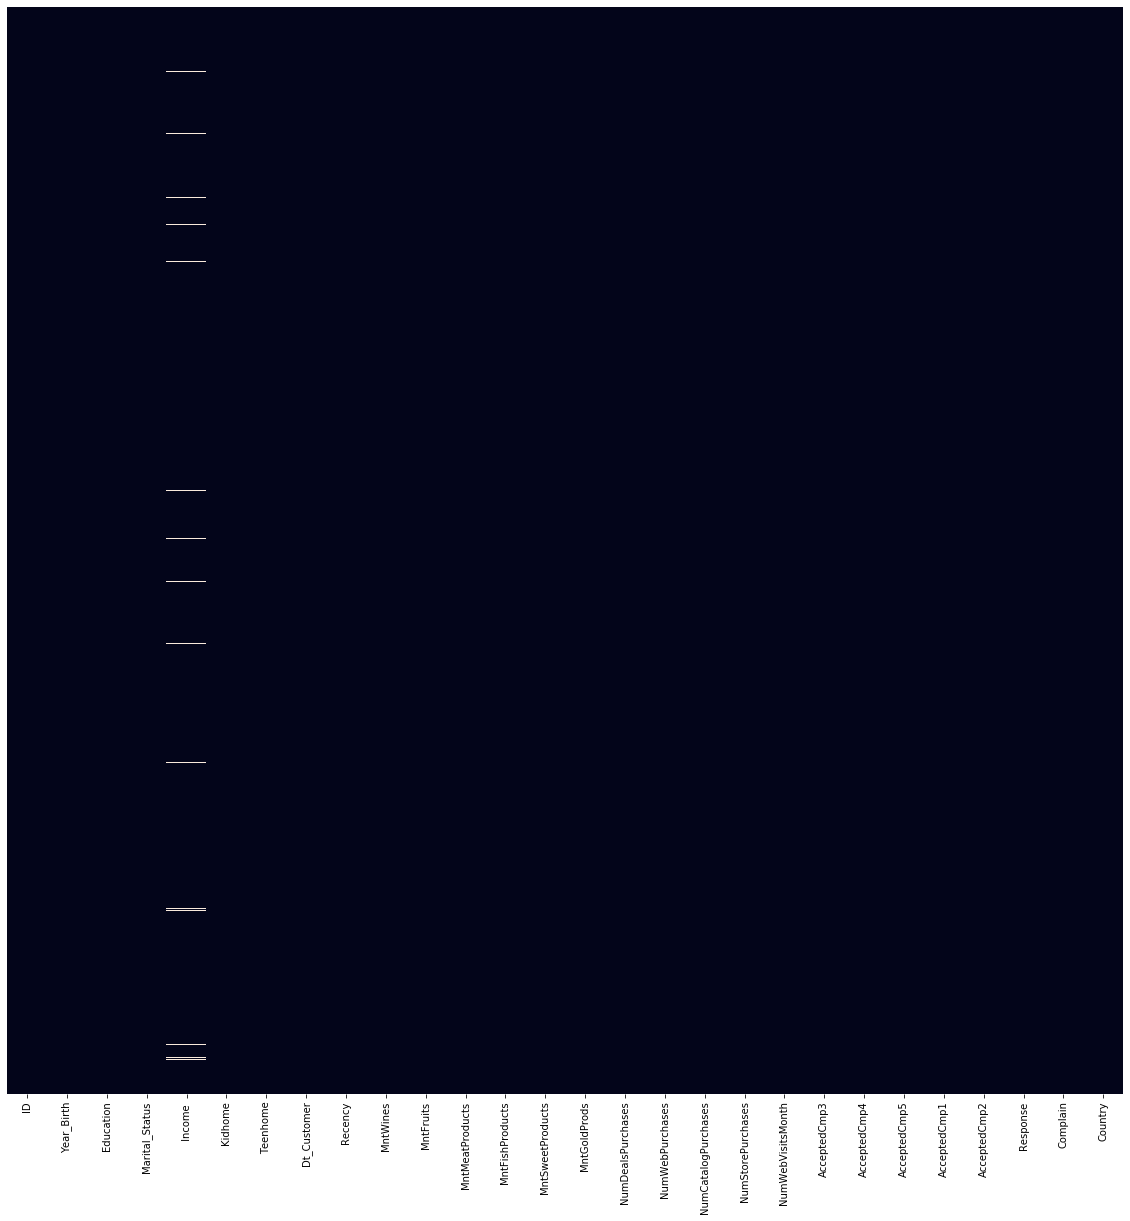

In [4]:
import seaborn as sns

plt.subplots(figsize = (20,20))

sns.heatmap(df.isnull(),yticklabels = False,cbar=False)

plt.show()

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
 Income                2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 n

In [8]:
df[' Income '].isna().values

array([False, False, False, ..., False, False, False])